In [57]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

import path_settings


In [58]:
def loss_path(exp_name, i):
    data_alias = 'D' + str(0).zfill(2)
    method_dir = os.path.join(path_settings.results_dir, exp_name)
    data_dir = os.path.join(method_dir, data_alias + '_' + str(i).zfill(4))
    loss_file_path = os.path.join(data_dir, 'loss.pkl')
    
    return loss_file_path

In [59]:
def average_loss(exp_name, data_list):
    loss_lists = []

    for i in data_list:
        loss_file_path = loss_path(exp_name, i)
        with open(loss_file_path, 'rb') as file:
            loss_list = pickle.load(file)
            loss_lists.append(loss_list)
            
    loss_array = np.array(loss_lists)
    average_loss = np.mean(loss_array, axis=0).tolist()
    
    return average_loss



In [60]:
def plot_loss(loss_list_gt, loss_list_recon, title, images_save_dir, fig_name, dimension, log_scale=False):
    if dimension == 3:
        loss_list_gt = [x * 1000 for x in loss_list_gt]
        loss_list_recon = [x * 1000 for x in loss_list_recon]
        ylabel = 'Error (mm)'
    if dimension == 2:
        ylabel = 'Error (pixels)'
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.suptitle(title)
    ax.plot(loss_list_recon, label='Reconstruction')
    ax.plot(loss_list_gt, label='Ground Truth', linestyle='--') 
    ax.set_xlabel('Iteration')
    ax.set_ylabel(ylabel)
    ax.set_xlim([0, len(loss_list_gt)])
    if log_scale:
        ax.set_yscale('log')
    else:
        ax.set_ylim(bottom=0)
    ax.grid(True)
    ax.legend()

    fig_path = os.path.join(images_save_dir, fig_name)
    if not os.path.exists(os.path.dirname(fig_path)):
        os.makedirs(os.path.dirname(fig_path))
    plt.savefig(fig_path)
    print('Plot saved at', fig_path)
    
    plt.show()

Plot saved at E:/OneDrive - UC San Diego/UCSD/Lab/Catheter/diff_catheter/results\3d_tip_loss.png


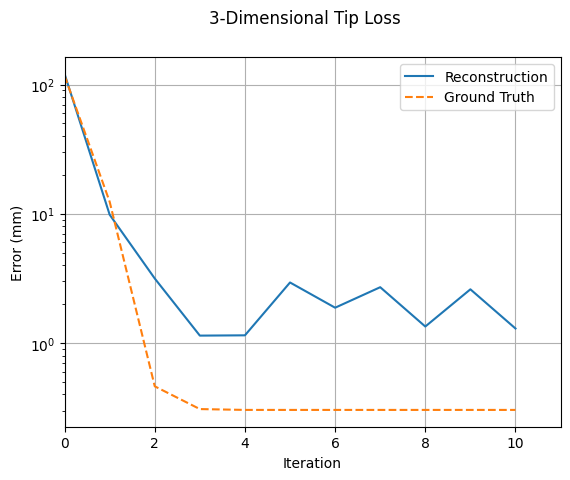

In [61]:
data_list = [0, 3, 5, 31, 47]

loss_recon = average_loss('EXP001', data_list)
loss = average_loss('EXP003', data_list)

title = '3-Dimensional Tip Loss'
fig_name = '3d_tip_loss.png'
plot_loss(loss, loss_recon, title, path_settings.results_dir, fig_name, 3, log_scale=True)

Plot saved at E:/OneDrive - UC San Diego/UCSD/Lab/Catheter/diff_catheter/results\3d_shape_loss.png


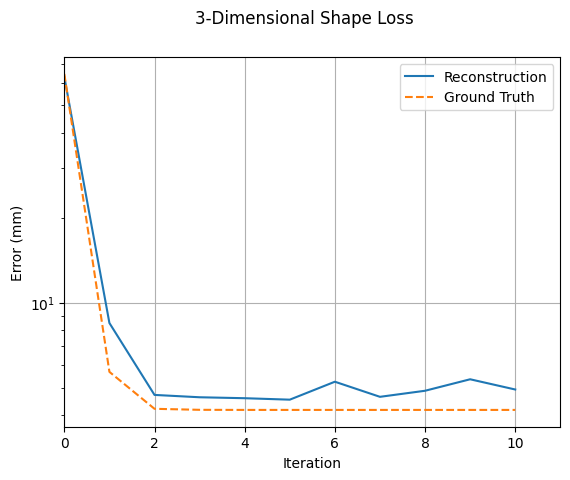

In [62]:
loss = average_loss('EXP004', data_list)
loss_recon = average_loss('EXP005', data_list)

title = '3-Dimensional Shape Loss'
fig_name = '3d_shape_loss.png'
plot_loss(loss, loss_recon, title, path_settings.results_dir, fig_name, 3, log_scale=True)

Plot saved at E:/OneDrive - UC San Diego/UCSD/Lab/Catheter/diff_catheter/results\2d_tip_loss.png


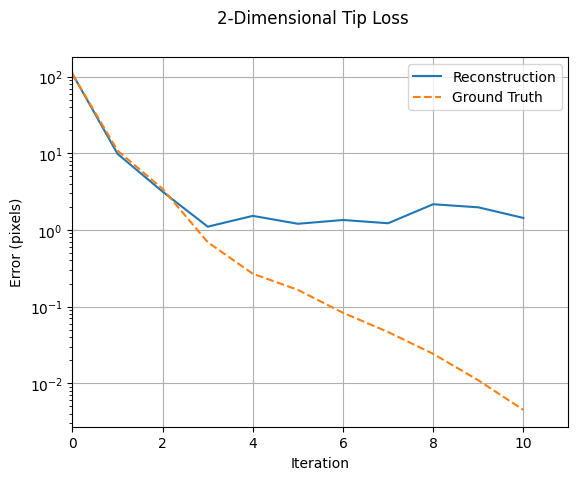

In [63]:
loss = average_loss('EXP006', data_list)
loss_recon = average_loss('EXP007', data_list)

title = '2-Dimensional Tip Loss'
fig_name = '2d_tip_loss.png'
plot_loss(loss, loss_recon, title, path_settings.results_dir, fig_name, 2, log_scale=True)